# FlyPrice Predictor: Anticipating Airfare Trends in India

Notebook Link - https://colab.research.google.com/drive/1bBL08bYJ2PmlHIYx-GomYEKEoY7hZ0kG#scrollTo=wxdwxKTxjQy2

By
- Aishwarya Jayant Rauthan
- Jaishankar Govindaraj
- Jasmine Gohil
- Mahika Bhartari

### Data Source
Easemytrip is an internet platform for booking flight tickets, serving as a gateway for potential passengers to purchase tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. (link - https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

### Objective
Our objective is to create a robust predictive model that can forecast the pricing dynamics of air tickets for domestic flights within India. This model aims to offer valuable insights into the factors affecting ticket prices.

### Motivation
We all are aware that the travel sector was adversely affected due to COVID-19. As soon as things started getting back to normal, the prices surged and still remain at an all time high especially for international travels. Our model will have real world significance and practical applications attached as it will train on a recent post-COVID dataset i.e. from February 11th to 31st March 2022. Ultimately our goal is to bring out innovative findings that enhance the existing body of knowledge in the airline industry.

### Executive Summary
In  the times where the aviation industry is characterised by a dynamic environment and ever-changing demand, our Fly-Price predictor model aims to solve this question for consumers, including YOU!
"When should I book my flight to get the cheapest one?"
We have constructed five models (Multiple Linear Regression, Random Forest, XG Boost, SVM, KNN) and selected the most optimal model among them, with high accuracy tailored for forecasting price levels in the airline sector in India. Using built in machine learning algorithms in sci-kit learn and data analysis methodologies including hyper parameter tuning, ensemble methods we wanted to deliver a solution that consumers can use while booking price tickets that suits their economical needs.
Our model has real world significance and practical applications attached as it has been trained on a recent post-COVID dataset i.e. from February 11th to 31st March 2022.
The airline companies can utilise our insights to make informed business decisions.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data

In [ ]:
biz= pd.read_csv('/content/business.csv')
eco = pd.read_csv('/content/economy.csv')

In [ ]:
l1=[]
l2=[]
x=0
y=0

while x<len(biz):
  l1.append('Business')
  x=x+1

while y<len(eco):
  l2.append('Economy')
  y=y+1

# identifiers for business and economy class

biz['class'] = l1
eco['class'] = l2

In [ ]:
# joining business and economy class dataset to get one single dataframe for the entire data

df = pd.concat([biz, eco], axis=0)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


Data Exploration

In [ ]:
# Checking for null values

df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [ ]:
#there are negligible null values, so we will drop them

df.dropna(inplace=True)

In [ ]:
# inspecting datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


As we can see, most of our columns are 'object' datatype right now. We shall fix this during the data cleaning process.

In [ ]:
#checking summary stats for all features

df.describe(include='all')

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
count,300261,300261,300261,300261.000000,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,8,NaN,251,6,483,40,266,6,12165,2
top,07-03-2022,Vistara,UK,NaN,07:00,Delhi,02h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Mumbai,"54,608",Economy
freq,6633,127859,127859,NaN,8760,61345,4242,243603,9194,59109,1445,206774
mean,NaN,NaN,NaN,1417.771709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1974.514439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,637.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,818.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Cleaning


In [ ]:
#exploring stop column to see our scope of conversion

df.stop.value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

As we can see that the stop column has information on layovers, so we shall make changes to the column to display the number of layovers for each journey.

In [ ]:
#converting stop into a categorical column to display the number of layovers for each flight

l= []

for x in df.stop:
  if x.strip() == 'non-stop':
    l.append('0')
  elif x[0] == '1':
    l.append('1')
  else:
    l.append('More than 1')

df['stop'] = l

In [ ]:
# calculating time_taken as number of minutes

l=[]

for x in df.time_taken:
  a, b=x.split('h')
  b=b.strip()
  b, c=b.split('m')
  hours = float(a)
  if(b==''):
    y= hours * 60
  else:
    minutes = int(b)
    y= hours * 60 + minutes
  l.append(y)

df['time_taken']=l

In [ ]:
# converting price to numeric

df['price']=df.price.str.replace(",","").astype('int')

In [ ]:
import datetime
# Converting the type of 'dep_time', 'arr_time', 'date' column  to datetime type
df['dep_time'] =pd.to_datetime(df['dep_time'])
df['arr_time']=pd.to_datetime(df['arr_time'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [ ]:
# Extract time features for date and departure and arrival times
df['dep_hour'] = df['dep_time'].dt.hour
df['arr_hour'] = df['arr_time'].dt.hour
df['day'] = df['date'].dt.day

In [ ]:
#sanity check

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  datetime64[ns]
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  float64       
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  datetime64[ns]
 9   to          300261 non-null  object        
 10  price       300261 non-null  int64         
 11  class       300261 non-null  object        
 12  dep_hour    300261 non-null  int64         
 13  arr_hour    300261 non-null  int64         
 14  day         300261 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(5), object(

Description of the columns in our dataset:-  

* *Date* - The date on which the flight operated
* *Arline* - Name of the airline companies i.e
  * Air India,
  * Air Asia,
  * Spicejet,
  * Vistara,
  * Go First,
  * Indigo
* *CH_code* - abbreviation of Airline
* *Num_code* - Number of the flight
* *Departure time* - stores information in day and time format of the departure time of flights
* *From* - City from which flights takes off, the cities are
  * Bangalore
  * Chennai
  * Delhi
  * Hyderabad
  * Kolkata
  * Mumbai
* *Time Taken* - Duration of the flight
* *Stop* - The number of stops between the source and destination cities. The column has 3 distinct values that store the number of stops i.e. 0, 1 and more than 1
* *Arrival Time* - stores information in day and time format of the arrival time of flights
* *To* - Destination city of the flight, the cities are Bangalore, Chennai, Delhi, Hyderabad, Kolkata and Mumbai
* *Class* - Information on seat class, Business and Economy class
* *Price* - Price of the ticket and our Target Variable.

Additional columns created by us during Cleaning:-

* *Day* - The day of the week on which the flight operated
* *Departure Hour* - The hour of the day on which the flight departed in 24 hour clock format
* *Arrival Hour* -  The hour of the day on which the flight arrived in 24 hour clock format
* *Route* - Departure and Destination city combined to get route of the flight

## Exploratory Data Analysis

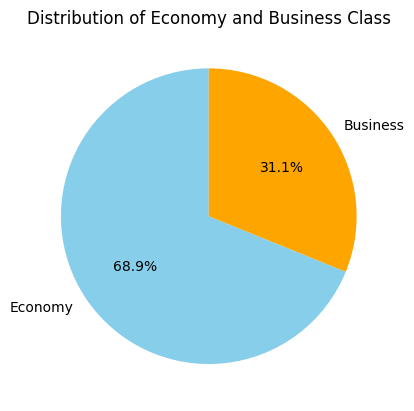

In [ ]:
# checking distribution of data with respect to the class of travel

df['class'] = df['class'].astype('category')
colors = ['skyblue', 'orange']
df_class= pd.DataFrame(df['class'].value_counts()).reset_index()
plt.pie(df_class['class'], labels=df_class['index'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Economy and Business Class')
plt.show()

It can be observed that about one-third (31.3% to be exact) of our data consists of flights that are business class while the rest(68.7%) is economy class.

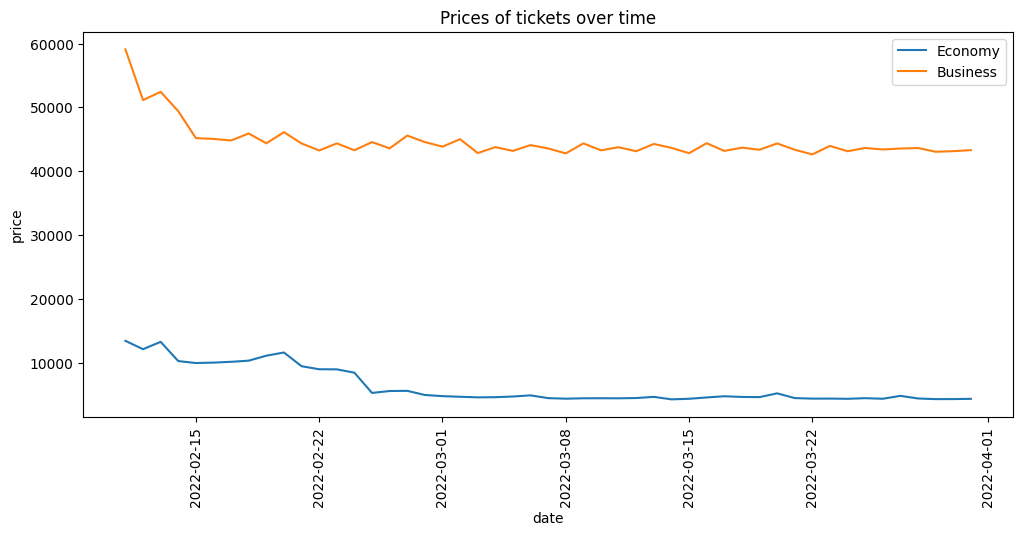

In [ ]:
# comparison of flight ticket price overtime for a particular route
df1 = df[(df['from']=='Delhi') & (df['to']=='Mumbai') & (df['class']=='Economy')]
df2 = df[(df['from']=='Delhi') & (df['to']=='Mumbai') & (df['class']=='Business')]

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x='date', y='price', errorbar=None, label='Economy');
sns.lineplot(data=df2, x='date', y='price', errorbar=None, label='Business');
plt.legend()
plt.title('Prices of tickets over time')
plt.xticks(rotation=90)
plt.show()

As observed in the graph above, ticket prices soar in the month of February and flatline towards March.
This could be due to the fact that this time of the year marks the transitioning season from winters to spring in India which probably encourages people to plan more trips around the country.
Another possible reason for this could be the fact that this time of the year is considered auspicious for weddings in India, which could be a driver for increased air travel.

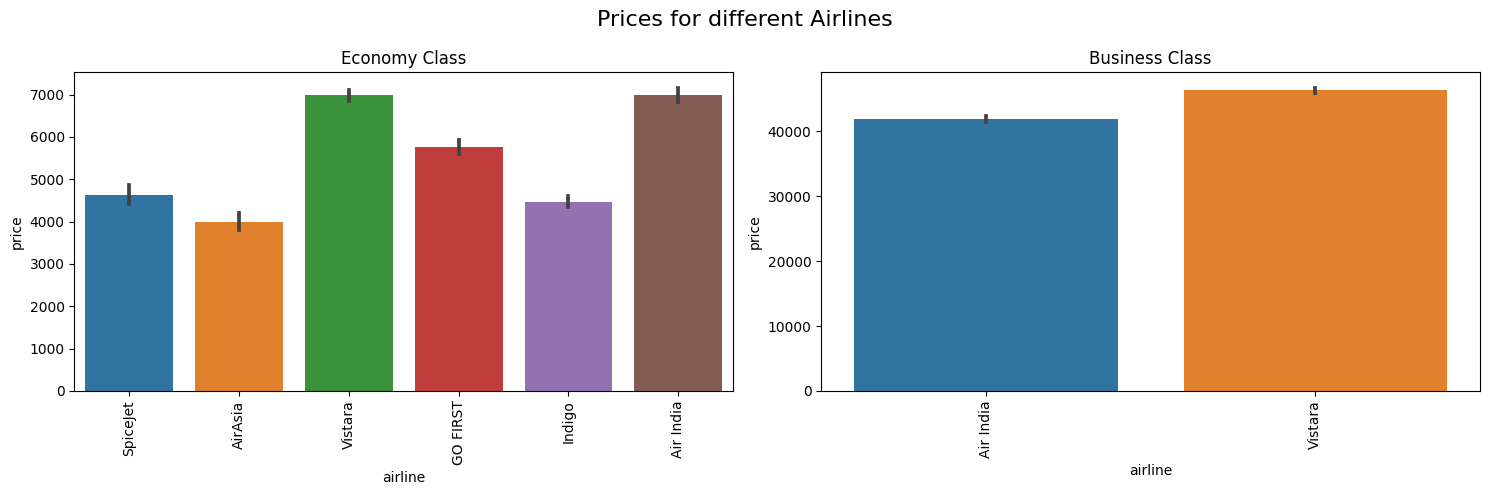

In [ ]:
# comparison of flight ticket price overtime for different airlines
df1 = df[(df['from']=='Delhi') & (df['to']=='Mumbai') & (df['class']=='Economy')]
df2 = df[(df['from']=='Delhi') & (df['to']=='Mumbai') & (df['class']=='Business')]


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Prices for different Airlines', fontsize=16)

# First subplot
plt.sca(axes[0])  # Select the first subplot
sns.barplot(data=df1, x='airline', y='price')
plt.xticks(rotation=90)
plt.title('Economy Class')

# Second subplot
plt.sca(axes[1])  # Select the second subplot
sns.barplot(data=df2, x='airline', y='price')
plt.xticks(rotation=90)
plt.title('Business Class')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

From the visualisations above, it can be observed that business class is only offered by Air India and Vistara and interestingly, these airlines also have the highest airfare for economy class. This could be due to the fact that these airlines offer better services and customer experience in general, which inflates the ticket price.

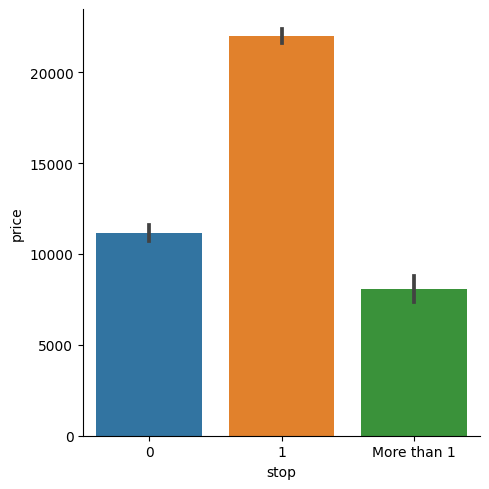

In [ ]:
# most popular route
route = df['from'] + ' to ' + df['to']

# creating a new df
df_pop = df.copy()
df_pop['route'] = route

# finding most popular route
df_pop.route.value_counts().sort_values().tail(1)

# comparing prices for the most popular route based on layovers (refine stop conversion code)

sns.catplot(data= df_pop[df_pop.route=='Delhi to Mumbai'], x = 'stop', y = 'price', kind='bar');

The price of the flights with the highest number of layovers is the lowest. However, it is interesting to see that flights with 1 layover have a higher price than flights with no layovers.

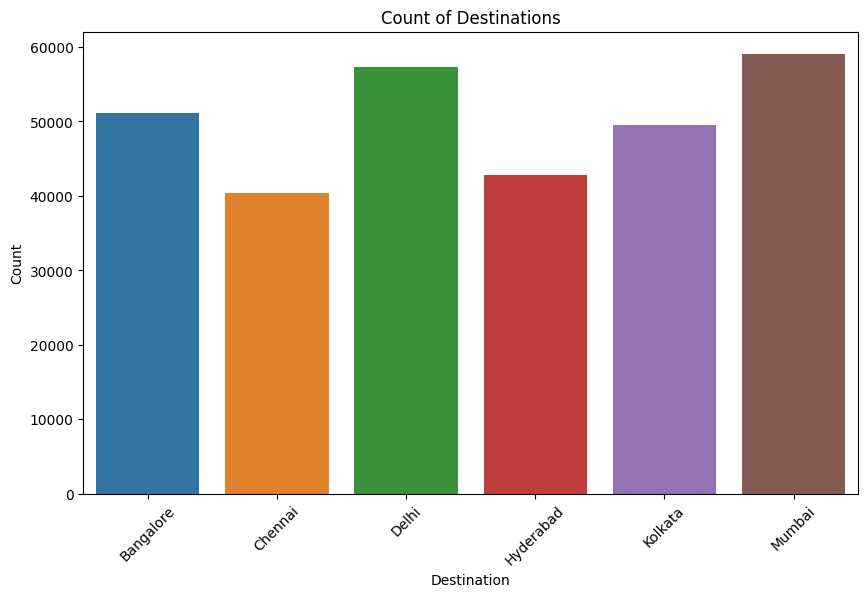

In [ ]:
# finding the most popular destination

# finding the count of flights that are going to different destinations
df['to'] = df['to'].astype('category')
count_of_to = df['to'].value_counts().reset_index()

count_of_to = df['to'].value_counts().reset_index()
count_of_to.columns = ['to', 'count_of_to']

# plotting the graph for count of flights and destination
plt.figure(figsize=(10, 6))
sns.barplot(x='to', y='count_of_to', data=count_of_to)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Count of Destinations')
plt.xticks(rotation=45)
plt.show()

It can be seen from the graph above that Delhi and Mumbai are two of the most popular destinations to fly to, according to our dataset.

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

cities = ['Mumbai', 'Kolkata', 'Hyderabad', 'Delhi', 'Chennai', 'Bangalore']

# Create a new DataFrame with the city names
cities_df = pd.DataFrame({'to': cities})

# Initialize the geolocator
geolocator = Nominatim(user_agent="city_locator")

# Function to get latitude and longitude for a city (used generative AI for the function below)
def get_lat_lon(city):
    location = geolocator.geocode(city)
    if location:
        print(f"{city}: {location.latitude}, {location.longitude}")
        return location.latitude, location.longitude
    else:
        print(f"Failed to geocode {city}")
        return None, None

# Apply the function to the DataFrame
cities_df[['latitude', 'longitude']] = cities_df['to'].apply(lambda city: pd.Series(get_lat_lon(city)))

# Merge the latitude and longitude back to your main DataFrame
df_merged = pd.merge(df, cities_df, on='to', how='left')

# Display the updated DataFrame
print(df_merged.head())

Mumbai: 18.9733536, 72.82810491917377
Kolkata: 22.5726459, 88.3638953
Hyderabad: 17.360589, 78.4740613


Delhi: 28.6273928, 77.1716954
Chennai: 13.0836939, 80.270186
Bangalore: 12.9767936, 77.590082
        date    airline ch_code  num_code            dep_time   from  \
0 2022-02-11  Air India      AI       868 2023-12-06 18:00:00  Delhi   
1 2022-02-11  Air India      AI       624 2023-12-06 19:00:00  Delhi   
2 2022-02-11  Air India      AI       531 2023-12-06 20:00:00  Delhi   
3 2022-02-11  Air India      AI       839 2023-12-06 21:25:00  Delhi   
4 2022-02-11  Air India      AI       544 2023-12-06 17:15:00  Delhi   

   time_taken stop            arr_time      to  price     class  dep_hour  \
0       120.0    0 2023-12-06 20:00:00  Mumbai  25612  Business        18   
1       135.0    0 2023-12-06 21:15:00  Mumbai  25612  Business        19   
2      1485.0    1 2023-12-06 20:45:00  Mumbai  42220  Business        20   
3      1590.0    1 2023-12-06 23:55:00  Mumbai  44450  Business        21   
4       400.0    1 2023-12-06 23:55:00  Mumbai  46690  Business        17   

   arr_hou

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
fig = px.scatter_mapbox(df_merged,
                        lat="latitude",
                        lon="longitude",
                        color="price",
                        size="num_code",
                        hover_name="airline",
                        template="plotly_dark",
                        mapbox_style="carto-positron",
                        zoom=4,  # Adjust the zoom level as needed
                        center={"lat": 20.5937, "lon": 78.9629},  # Centered around India
                        title="Flight Data Interactive Map - India",
                        labels={"price": "Price", "num_code": "Flight Code"}
                       )

fig.show()

Output hidden; open in https://colab.research.google.com to view.

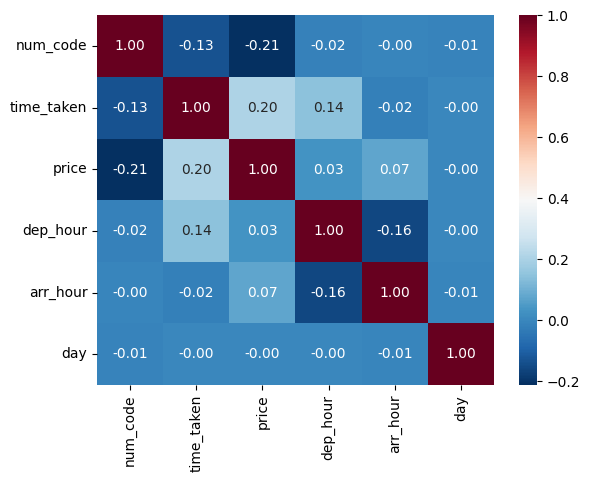

In [ ]:
#visualising a correlation matrix for numerical columns

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');

It can be observed that time_taken has the highest psoitive correlation with price, meaning that higher duration flights are expected to have higher prices.

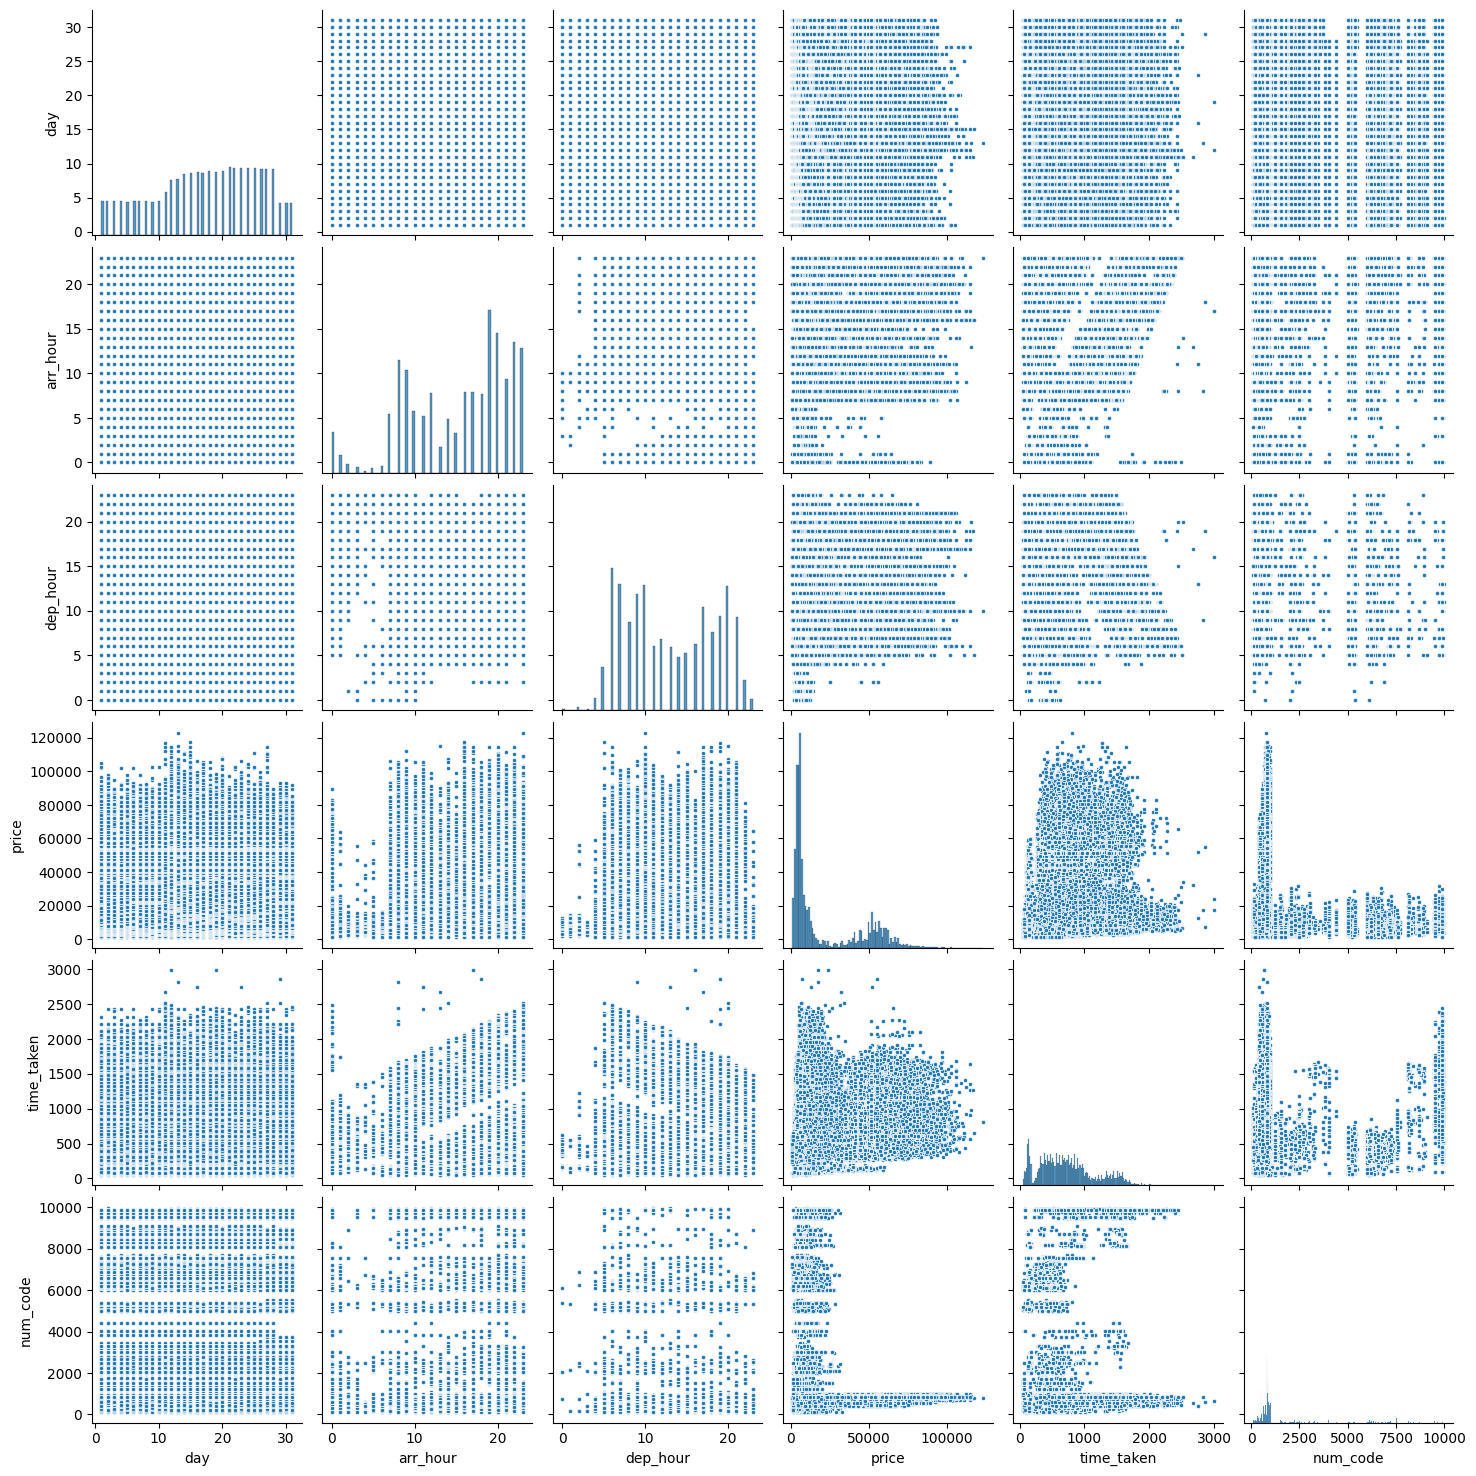

In [ ]:
# visualising a pair plot for numerical features in the dataset

attributes = ["day", "arr_hour", "dep_hour", "price", "time_taken", "num_code"]
sns.pairplot(df[attributes], markers='.');

## Model Building

### Preprocessing Pipeline

In [ ]:
# importing libraries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display='diagram')

# defining the numerical column transaformer
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

# defining the categorical column transaformer
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(drop="first", handle_unknown='ignore'))
    ])

num_attribs = ['time_taken', 'day', 'arr_hour', 'dep_hour']
cat_attribs = ['airline', 'stop', 'to', 'from', 'class']

preprocess_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['airline', 'stop', 'to', 'from', 'class']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['time_taken', 'day', 'arr_hour',
                                  'dep_hour'])])

Two separate pipelines are created, one for numerical features and another for categorical features.

Numeric Pipeline:
* Step 1- SimpleImputer is used to fill missing values in numerical columns. Here, it fills missing values with the median of each column.
* Step 2- StandardScaler is used to standardize the numerical data, ensuring mean=0 and variance=1.

Categorical Pipeline:
* Step 1: SimpleImputer is used to fill missing values in categorical columns. It fills missing values with the most frequent value of each column.
* Step 2: OneHotEncoder is used to convert categorical variables into a numerical format. The parameter, drop="first" drops the first category in order to avoid multicollinearity.

The ColumnTransformer is used to combine the separate pipelines for numerical and categorical features.
It specifies which transformations should be applied to which columns. For categorical columns, the transformations from cat_pipeline are applied, while for numerical columns, the transformations from num_pipeline are applied.

Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'date', 'arr_time', 'dep_time', 'num_code', 'ch_code'], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Data is split into train and test portions. Train contains 80% of the data while the Test set contains the remaining 20%.

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(preprocess_pipeline, LinearRegression()) # append to the preprocessing pipeline
lr_pipe.fit(X_train, y_train) # fit the pipeline on training data
lr_pred = lr_pipe.predict(X_test)
lr_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['airline', 'stop', 'to',
                                                   'from', 'class']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time_taken', 'day',
                                                   'arr_hour', 'dep_hour'])])),
                ('linearregression', LinearRegression())])

Model Evaluation

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, lr_pred)}')
print(f'R^2 Score: {r2_score(y_test, lr_pred)}')

Mean Squared Error: 49477452.58040884
R^2 Score: 0.9037171300258225


* The Mean Squared Error is a measure of the average squared difference between the predicted and actual values. In this case, the MSE is approximately 49,477,452.58. This value represents the average squared error per prediction.

* A lower MSE indicates better model performance. Here a relatively large MSE suggests that, on average, the model predictions deviate from the actual values by a substantial amount.

* The R^2 Score (coefficient of determination) represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Here, the R^2 Score is approximately 0.904, which is quite high.

* The high R^2 Score suggests that the multiple linear regression model is a good fit for the data, explaining a substantial portion of the variability in the target variable. However, the relatively high MSE indicates that there are still some errors in the predictions.

In [ ]:
# Evaluating the model using RMSE
rmse = mean_squared_error(y_test, lr_pred, squared = False)
print(f'Root Mean Squared Error on test data: {rmse:.2f}')

# What would the error be if measured on the training data?

train_rmse = mean_squared_error(y_train, lr_pipe.predict(X_train), squared = False)
print(f'Root Mean Squared Error on training data: {train_rmse:.2f}')

Root Mean Squared Error on test data: 7034.02
Root Mean Squared Error on training data: 6988.57


* The RMSE values on both the test and training data seem relatively close, which is a positive indication. It suggests that the model is generalizing well to new, unseen data, and there isn't a substantial overfitting issue.

* For example, if the average ticket price is around  INR 50,000, an RMSE of 7034.02 may be considered high, indicating that the model's predictions have relatively large errors.

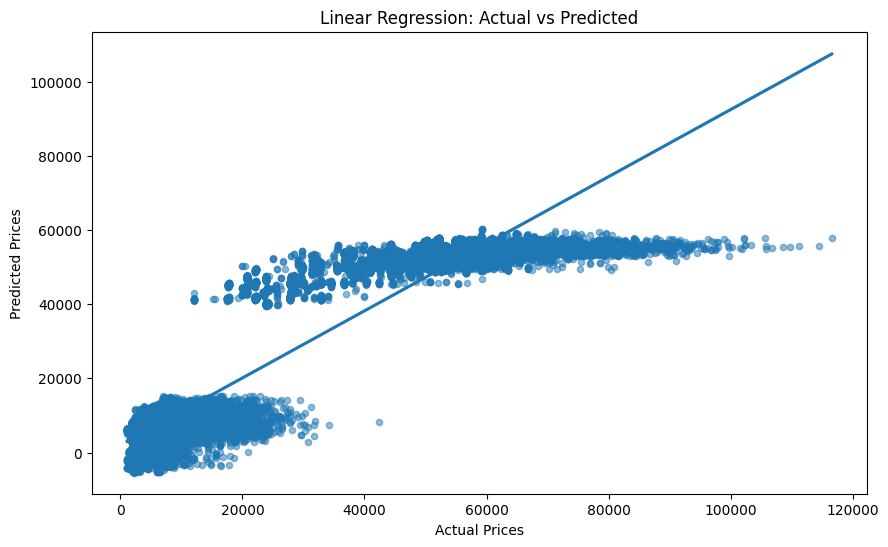

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=lr_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

* Above is the graphical representation of the linear regression model where the actual prices are set on the X-axis and the predicted prices are set on the Y-axis.
* Here, we can see that the model is not very efficient at predicting airplane prices except between INR 4000 to  6000 where it predicts the prices decently well.

OLS Regression

In [ ]:
import statsmodels.formula.api as smf

ols1 = smf.ols('price ~ dep_hour + arr_hour + C(stop)' , df).fit()
print(ols1.summary().tables[1])   # printing only the coefficient table

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3003.0339    191.593     15.674      0.000    2627.516    3378.552
C(stop)[T.1]            1.333e+04    124.994    106.624      0.000    1.31e+04    1.36e+04
C(stop)[T.More than 1]  4667.9353    225.575     20.693      0.000    4225.814    5110.056
dep_hour                 185.5897      7.651     24.257      0.000     170.594     200.585
arr_hour                 270.8073      6.778     39.954      0.000     257.523     284.092


Intercept:

* Coefficient: 3003.0339
* The intercept is statistically significant as P-value = 0.000.

Categorical Variable (stop):

* C(stop)[T.1] represents the estimated change in the dependent variable when there is one stop compared to the reference category, which is zero stops.


*  The positive coefficient shows that having one stop is associated with an increase in the dependent variable compared to the reference category.

* C(stop)[T.More than 1] represents the estimated change in the dependent variable when there are more than one stops compared to the reference category.

* The positive coefficient suggests that having more than one stop is associated with an increase in the dependent variable compared to the reference category.

Numeric Variables (dep_hour and arr_hour):

* dep_hour and arr_hour have positive coefficients, indicating that as these variables increase, the dependent variable also increases, which means that early hours of the day are more likely to have lower air fare than the later hours of the day.
* Both have highly statistically significant p-values (0.000), showing that these variables are significant predictors of the dependent variable.


The model suggests that the number of stops, departure hour, and arrival hour are all significant predictors of the dependent variable.
The coefficients indicate the direction and magnitude of the relationship between each predictor and the dependent variable.

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipe = make_pipeline(preprocess_pipeline, RandomForestRegressor(n_estimators=100, random_state=42)) # append to the preprocessing pipeline
rfr_pipe.fit(X_train, y_train) # fit the pipeline on training data
rfr_pred = rfr_pipe.predict(X_test)

In [ ]:
# Model Evaluation using R-square

from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, rfr_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.9692495138651346


An R-squared score of 0.9692, indicates that approximately 97% of the variance in the target variable is explained by the features in your model. This suggests that the model, as evaluated on the test data, fits the observed data extremely well and can explain a substantial amount of the variability in the target variable.

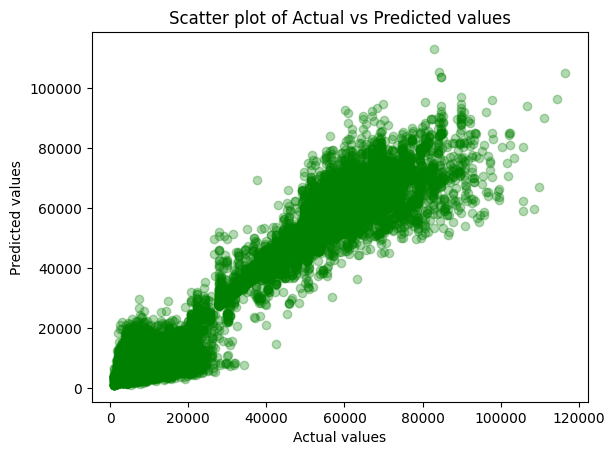

In [ ]:
# plotting actual vs predicted values

plt.scatter(y_test, rfr_pred, alpha=0.3, c='green')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of Actual vs Predicted values')
plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter space for Randomized Search
param_dist = {
    'randomforestregressor__n_estimators': randint(50, 300),
    'randomforestregressor__max_depth': [None, 5, 10, 15],
    'randomforestregressor__min_samples_split': randint(2, 20),
    'randomforestregressor__min_samples_leaf': randint(1, 20),
}

# defining the number of iterations
n_iterations = 5

# Adjusting the number of folds for cross validation
n_cv_folds = 3

# Creating RandomizedSearchCV with adjusted parameters
random_search = RandomizedSearchCV(rfr_pipe, param_distributions=param_dist, n_iter=n_iterations, cv=n_cv_folds, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fitting RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluating the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
rfr_rs_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best Hyperparameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 7, 'randomforestregressor__min_samples_split': 12, 'randomforestregressor__n_estimators': 252}


1. randomforestregressor__max_depth: The value `None` for this hyperparameter means that the trees in the Random Forest can expand until all leaves contain less than the specified `min_samples_split`. This indicates that there's no restriction on the maximum depth of the trees.

2. randomforestregressor__min_samples_leaf: It's set to `7`, meaning that each leaf node in the trees within the Random Forest must contain at least 7 samples.

3. randomforestregressor__min_samples_split: This parameter is set to `12`, implying that a node won't split further if the number of samples at that node is less than 12.

4. randomforestregressor__n_estimators: This hyperparameter is set to `252`, indicating that the Random Forest will be composed of 252 decision trees.

Inference:
- The absence of a specified maximum depth (`None`) might result in a more complex model where the trees are allowed to grow without limitations until the specified minimum sample criteria for splitting and leaf nodes are met.
- A `min_samples_leaf` value of `7` suggests a relatively larger minimum number of samples required at each leaf node, which could potentially prevent overfitting by ensuring a certain level of generalization.
- With a `min_samples_split` value of `12`, the algorithm might avoid splitting nodes that have fewer than 12 samples, which could lead to a more robust model against noise or outliers.
- Having 252 estimators in the Random Forest ensemble might result in a stronger and more stable predictive performance due to the aggregation of predictions from a large number of trees.

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, rfr_rs_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.9769540256595135


Accuracy increased to about 97.6% after tuning the hyperparameters with their best values as per the algorithm above.

### XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

xgb_pipe = make_pipeline(preprocess_pipeline, XGBRegressor(n_estimators=100, random_state=42)) # append to the preprocessing pipeline
xgb_pipe.fit(X_train, y_train) # fit the pipeline on training data
xgb_pred = xgb_pipe.predict(X_test)

In [ ]:
#Model Evaluation

# MSE
mse = mean_squared_error(y_test, xgb_pred)
print(f'Mean Squared Error: {mse}')

#Testing accuracy with R squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, xgb_pred)
print(f'R-squared Score: {r2}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 15287018.778391978
R-squared Score: 0.97025153954843
Root Mean Squared Error (RMSE): 3909.8617339225666


An R-squared value of 0.97 (97%) is quite high, suggesting that our XGBoost model explains 97% of the variance in the target variable, which suggests decent accuracy. An RMSE of 3909.86 indicates that, on average, your model's predictions are off by approximately 3909.86 units in the original scale of the target variable. A high R-squared and a relatively large RMSE could suggest that while the model explains most of the variance, there are still considerable errors in predicting individual data points.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'xgbregressor__n_estimators': randint(50, 200),
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbregressor__max_depth': randint(3, 10),
    'xgbregressor__subsample': [0.8, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_pipe, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding MSE
print("Best Parameters: ", random_search.best_params_)
print("Best Mean Squared Error: ", -random_search.best_score_)

# Predict on the test set using the best estimator from the search
y_pred_tuned = random_search.best_estimator_.predict(X_test)

# Calculate Mean Squared Error and R-squared Score for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Squared Error: {mse_tuned}')
print(f'Tuned Model R-squared Score: {r2_tuned}')

Best Parameters:  {'xgbregressor__colsample_bytree': 1.0, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 9, 'xgbregressor__n_estimators': 64, 'xgbregressor__subsample': 0.9}
Best Mean Squared Error:  12512060.299369942
Tuned Model Mean Squared Error: 12413761.29956861
Tuned Model R-squared Score: 0.9758428839246646


1. colsample_bytree: 1.0
   - This parameter determines the fraction of features to be randomly sampled for each tree. A value of 1.0 means that all features are considered for splitting at each node. In this case, it indicates that the model considers all features at each split.

2. learning_rate: 0.2
   - Learning rate controls the contribution of each tree to the final prediction. A lower learning rate requires more trees to model the relationship but can lead to better generalization. A value of 0.2 suggests a moderately low learning rate, balancing model accuracy and training speed.

3. max_depth: 9
   - Max depth limits the maximum depth of each tree. A higher value allows the model to capture more complex relationships in the data but increases the risk of overfitting. A depth of 9 indicates relatively deep trees in our model.

4. n_estimators: 64
   - This is the number of trees (or boosting rounds) in the model. Increasing the number of trees can improve model performance, but it also requires more computation. In this case, 64 trees are used, which strikes a balance between performance and computational efficiency.

5. subsample: 0.9
   - Subsample is the fraction of the training data to be used for growing each tree. A value of 0.9 means that 90% of the training data is randomly sampled for each tree. This can add randomness to the training process, reducing overfitting.
   
After tuning these hyperparameters, we observe a higher accuracy score in our model, with r^2 as about 0.9758 (97.5% approx).

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# fitting the KNN regressor
knn_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('regressor', knn_regressor)
])

# Fit the pipeline on the training data
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, knn_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r_squared = r2_score(y_test, knn_pred)

print(f'R-squared: {r_squared:.3f}')

Mean Squared Error: 17236275.849116612
R-squared: 0.966


In [ ]:
# Make predictions on the training set
y_pred_train = knn_pipeline.predict(X_train)

# Calculate R-squared on the training set
r_squared_train = r2_score(y_train, y_pred_train)

print(f'R-squared on Training Set: {r_squared_train:.3f}')

R-squared on Training Set: 0.978


The model is configured with 5 neighbors, and the default settings for KNN regression, employing 'uniform' weights and 'minkowski' metric.

R-Squared on Test Data: 0.966
This result signifies that the regression model explains approximately 96.6% of the variance in the test data's target variable, suggesting strong generalization to new, unseen data.

Checking for Overfitting - R-Squared on Train Data: 0.978
An R-squared of 0.978 on the training data indicates a robust fit of the model to the training set. While a high R-squared is desirable, it's essential to assess how well the model generalizes to new data, as demonstrated by the strong performance on the test set.

A commendable aspect is the high R-squared values on both the training and test datasets, indicating that the model effectively captures underlying patterns and exhibits good generalization.

### SVM

In [ ]:
# taking a random sample of the dataset to train this model

data = df.astype({'airline': 'category', 'from':'category', 'to':'category', 'class':'category', 'stop':'category', 'time_taken':'int64'})
subset_random = data.sample(n=10000, random_state=42)

In [ ]:
# doing a train/test split on the subset

X_SVM = subset_random.drop(['price', 'date', 'ch_code', 'num_code', 'dep_time', 'arr_time'], axis=1)
y_SVM = subset_random['price'].copy()
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, test_size=0.20, random_state=42)
X_train_SVM.shape, X_test_SVM.shape, y_train_SVM.shape, y_test_SVM.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [ ]:
# creating a pipeline specific to SVM

from sklearn.compose import make_column_selector

set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocess_SVM_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

preprocess_SVM_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb5025b280>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb50259ed0>)])

In [ ]:
from sklearn.svm import SVR

# fitting the model to pipeline
svm_pipeline = Pipeline([
    ("preprocessing", preprocess_SVM_pipeline),
    ("svm", SVR())
])

svm_pipeline.fit(X_train_SVM, y_train_SVM)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb5025b280>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb50259ed0>)])),
                ('svm', SVR())])

In [ ]:
from sklearn.metrics import r2_score

y_pred_SVM = svm_pipeline.predict(X_test_SVM)

# Calculate R-squared
r_squared = r2_score(y_test_SVM, y_pred_SVM)

print(f'R-squared: {r_squared:.3f}')

R-squared: -0.313


In [ ]:
# performing grid search for tuning

from sklearn.model_selection import GridSearchCV

param_grid = [
  {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100]},
  {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]},
]

grid_search = GridSearchCV(estimator = svm_pipeline, param_grid = param_grid, cv=3)
grid_search.fit(X_train_SVM, y_train_SVM)

model = grid_search.best_estimator_
y_pred_1 = model.predict(X_test_SVM)

r_squared = r2_score(y_test_SVM, y_pred_1)
print(f'R-squared: {r_squared:.3f}')

R-squared: 0.904


Support Vector Regression (SVR) is a machine learning algorithm designed for regression tasks, predicting continuous outcomes. Key concepts include support vectors, a hyperplane determined by these vectors, and the use of kernel functions for capturing complex relationships. SVR employs an epsilon-insensitive loss function, making it robust to outliers, and includes a regularization parameter (C) for controlling model complexity. It's effective in high-dimensional spaces but requires careful tuning of hyperparameters.

We chose a random subset of our dataset of around 10,000 rows for computational purposes.

The R-squared (R²) values reported provide insights into the performance of a Support Vector Regression (SVR) model, both in its original form and after hyperparameter tuning using GridSearchCV.

R Square on SVR model = -0.313:

The R-squared score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in a regression model.
An R-squared value of -0.313 suggests that the SVR model, as initially trained without hyperparameter tuning, performs poorly. In fact, it indicates that the model may be performing worse than a simple mean-based prediction. A negative R-squared can occur when the model's predictions are not aligned with the mean of the target variable and when it does not follow the general trend of the main data.

R Square on SVR model through GridSearchCV parameters = 0.904:

The R-squared score after hyperparameter tuning using GridSearchCV is now 0.904.
An R-squared value of 0.904 is significantly better than the negative value obtained previously. It indicates that, after optimizing the hyperparameters using GridSearchCV, the SVR model has improved substantially. The positive R-squared suggests that the model explains a large proportion of the variance in the target variable, indicating a good fit to the data.

Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. The substantial improvement in R-squared from -0.313 to 0.904 highlights the effectiveness of selecting the right set of hyperparameters for the SVR model through GridSearchCV.

## Voting and Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_regression

# Define individual regressors
regressor1 = lr_pipe
regressor2 = rfr_pipe
regressor3 = xgb_pipe
regressor4 = knn_pipeline

# Creating a VotingRegressor with the defined regressors
voting_regressor = VotingRegressor(
    estimators=[('lr', regressor1), ('rf', regressor2), ('knn', regressor3), ('xgb', regressor4)]
)

# Fit the VotingRegressor on training data
voting_regressor.fit(X_train, y_train)

# Make predictions
predictions = voting_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Squared Error: 16327994.212678507
R^2 Score: 0.9682258066709575


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Define individual regressors
regressor1 = lr_pipe
regressor2 = rfr_pipe
regressor3 = xgb_pipe
regressor4 = knn_pipeline

# Define meta-estimator
meta_estimator = RidgeCV()

# Creating a StackingRegressor with the defined base and meta-estimators
stacking_regressor = StackingRegressor(
    estimators=[('lr', regressor1), ('rf', regressor2), ('knn', regressor3), ('xgb', regressor4)],
    final_estimator=meta_estimator
)

# Fit the StackingRegressor on training data
stacking_regressor.fit(X_train, y_train)

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Squared Error: 13867839.552795306
R^2 Score: 0.9730132550718011


The idea behind stacking is to combine the strengths of multiple models and compensate for their individual weaknesses. By training a meta-model on the predictions of base models, stacking aims to capture patterns or relationships in the errors of the base models, potentially improving overall predictive performance.
In this case, the MSE is 14,618,409.60, which seems relatively high,
A score of 0.97 indicates that the model explains a high percentage of the variance in the test data, which is generally very good.the stacking ensemble seems to perform well on the given dataset, capturing a high percentage of the variance.
This also means that the complex model that was built by stacking  ensemble method was similar  to our XG Boost and Random Forest model while making predictions.

Coming to the second ensemble method, Voting, it combines the accuracy of Linear regression, Decision tree regressor, KNN regressor and XG boost to improve overall performance. In our case our MSE score is 16,326,187.66 compared to stacking which is 14,618,409.59 hence we can conclude that Stacking performs better with a less error than Voting. Similarly voting gives a lower R squared as well compared to Stacking. The varied difference can be because In Voting, the individual base models independently make predictions, and the final prediction is determined by an average (for regression) whereas Stacking allows the ensemble to learn not only from the raw predictions of base models but also from their errors and uncertainties.

## Challenges
- Our datatset contains 12 columns and 300261 rows which posed difficulties during model building and hyperparameter tuning processes. To tackle this issue, we tried to optimize our parameters which therefore resulted in bettering the computational time.
- For the date, dep_time, arr_time columns, numeric features of these had to be extracted in order to make these features relevant for our model. This issue required deliberations for which we extracted days (day of the month) out of the date column, hour of the day from the dep_time and arr_time columns for them to be included in the modelling process.
- While building the Support Vector Machine Model, we encountered a negative R-squared value, due to which we had to rule the model out of consideration.

## Conclusion

Through our analysis and machine learning modelling on the dataset, it could be observed that Random Forest Regressor and XGBoost Regressor models worked the best for us. These models performed even better after performing fine-tuning techniques, further improving the accuracy. These models were chosen based on accuracy metrics like R-square and RMSE, outperforming other regression algorithms like Linear Regression, K-Nearest Neighbours and Support Vector Machines. Out of these two, XGBoost was selected as the final modelling algorithm due to its high accuracy metrics and decently low computational time, making it an optimal choice from our repertoire. Further, this algorithm can also be utilised by airline companies in order for them to make data-driven business decisions by tuning their air fare.

Factors such as the continued existence of loss-making carriers, a bloated cost structure, and vulnerability to external events pose significant obstacles to profitability in the airline industry.

Airlines can address these challenges by leveraging Machine Learning models to implement dynamic pricing strategies. These models consider various factors such as the number of layovers, seasonality, and historical pricing to optimize their pricing structures.

Airlines face substantial costs, with labor and fuel being the majority. Labor accounts for approximately 31% of operational expenses, followed by fuel at 22%.While a few low-cost airlines have successfully achieved consistent profits, profitable airlines are generally rare. Forecasting the optimal future ticket prices becomes crucial for maintaining a balance between revenue optimization and offering reasonable ticket prices to customers.

Given the high competitiveness of the airline industry, it is imperative for airlines to analyze competitors' strategies. Adjusting prices well in advance based on these analyses is essential for maintaining a competitive edge and meeting market demands.

The integration of Machine Learning for dynamic pricing, a focus on optimizing cost structures, and a strategic approach to pricing in the competitive landscape are vital components for addressing challenges and enhancing profitability in the airline industry.

## Citations

https://www.investopedia.com/financial-edge/0510/4-reasons-why-airlines-are-always-struggling.aspx#:~:text=Airlines%20provide%20a%20vital%20service,a%20huge%20impediment%20to%20profitability

https://www.reuters.com/graphics/INDIA-AIRLINES/egpbmkyyqvq/

https://stackoverflow.com/questions/67959140/what-does-negative-r2-score-mean-in-regression#:~:text=R2%20is%20negative%20only%20when,performance%20because%20of%20over%2Dfitting.&text=It%20can%20be%20a%20case,and%20noise%20in%20the%20dataset

* Used Generative AI to denug the SVM model code as the r-square was negative.
* Used Generative AI to learn more about the explanation of the best parameters found after hyperparameter tuning.
